In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import rigidpy as rp

Studio di un sistema formato da quattro punti collegati da delle molle, nel primo punto studieremo il sistema i cui collegamenti formato un quadrato in due dimensioni. Con l'utilizzo della libreria rigidpy.
Definiamo per creare il nostro reticolo elastico i vettori di base, le coordinate dei nodi e i collegamenti.

I vettori di base sono dati da 

v1 = [10, 0]



v2 = [0, 10]


Mentre i punti del reticolo iniziale hanno coordinate 


P1 = [0.1, 0.1]




P2 = [0.1, 1.1]



P3 = [1.1, 1.1]




P4 = [1.1, 0.1]

A questo punto carichiamo le coordinate dei punti, i vettori di base e i legami tra i punti in modo da costruire il reticolo iniziale. E di tale reticolo forniamo la rappresentazione, calcoliamo la matrice hessiana con relativi autovalori e autovettori.

[]


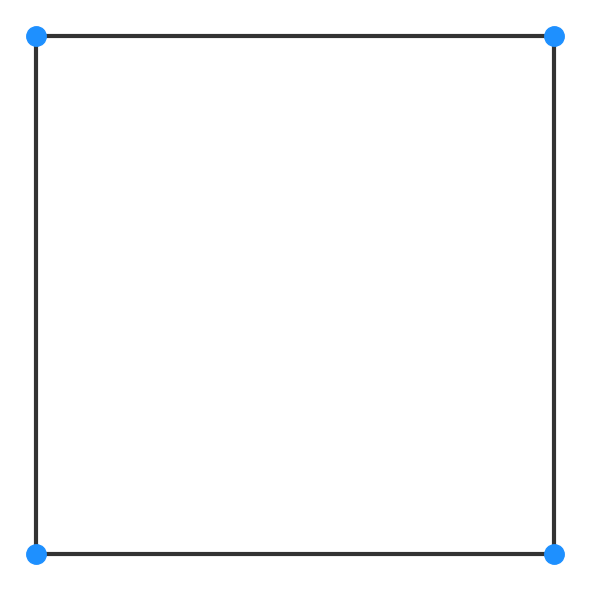

[[ 1.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  1.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.  0.]
 [ 0. -1.  0.  1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0. -1.]
 [-1.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  1.]]
[[0.1 0.1]
 [0.1 1.1]
 [1.1 1.1]
 [1.1 0.1]]


In [92]:
coordinates = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/coordinates.txt")
temp = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/bonds.txt")
bonds = temp.astype(int)
basis = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/basis.txt")
F= rp.framework(coordinates,bonds,basis)
F.visualize()

print(F.hessianMatrix())
print(coordinates)
#Eigenvalues, Eigenvectors = np.linalg.eig(F.hessianMatrix())
#print(Eigenvalues)
#print(Eigenvectors)
config = rp.configuration(coordinates,bonds,basis)
Eigenvalues, Eigenvectors = F.eigenSpace(eigvals = None)


Notiamo dagli autovalori che i primi quattro sono considerabili tutti nulli, mentre gli altri quattro sono tutti uguali.

Definisco una funzione per plottare l'autovettore legato ad un autovalore

In [93]:
def eigenVector_plotting(number,coordinates,Eigenvalues,Eigenvectors):
    print("Plottiamo l'autovettore relativo all'autovalore " + str(Eigenvalues[number]))
    V_coordinate_tot = Eigenvectors[number,:]
    V_coordinate_0 = V_coordinate_tot[0:2]
    V_coordinate_1 = V_coordinate_tot[2:4]
    V_coordinate_2 = V_coordinate_tot[4:6]
    V_coordinate_3 = V_coordinate_tot[6:8]
    plt.arrow(coordinates[0,0],coordinates[0,1],V_coordinate_0[0],V_coordinate_0[1],head_width=0.1, head_length=0.1, color='r', length_includes_head=True)
    plt.arrow(coordinates[1,0],coordinates[1,1],V_coordinate_1[0],V_coordinate_1[1],head_width=0.1, head_length=0.1, color='g', length_includes_head=True)
    plt.arrow(coordinates[2,0],coordinates[2,1],V_coordinate_2[0],V_coordinate_2[1],head_width=0.1, head_length=0.1, color='y', length_includes_head=True)
    plt.arrow(coordinates[3,0],coordinates[3,1],V_coordinate_3[0],V_coordinate_3[1],head_width=0.1, head_length=0.1, color='m', length_includes_head=True)
    plt.plot(coordinates[0,0], coordinates[0,1], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
    plt.plot(coordinates[1,0], coordinates[1,1], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
    plt.plot(coordinates[2,0], coordinates[2,1], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
    plt.plot(coordinates[3,0], coordinates[3,1], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.title("Autovettore relativo all'autovalore " + str(number) + " pari a " + str(Eigenvalues[number]))
    plt.show
    
    return None
    
    

Plottiamo l'autovettore relativo all'autovalore 2.0


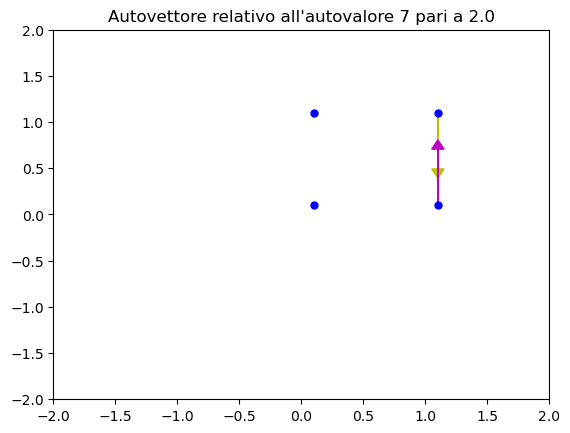

In [112]:
eigenVector_plotting(7,coordinates,Eigenvalues,Eigenvectors)

A questo punto deformiamo la matrice, applicando una deformazione tale che gli estremi lungo la diagonale vengano tirati e il quadrato si deformi in un rombo.


La matrice di deformazione agisce sulle coordinate e viene così rappresentata

\begin{pmatrix}
1 & -\epsilon \\
-\epsilon & 1 \\
\end{pmatrix}


Dove epsilon è manipolabile ed è compreso tra 0 ed 1, tanto più è vicino ad 1 tanto più lo strechting è forte, ovviamente se $\epsilon$ è 0 la matrice di deformazione è l'identità.


Facciamo un esempio

[]
[]


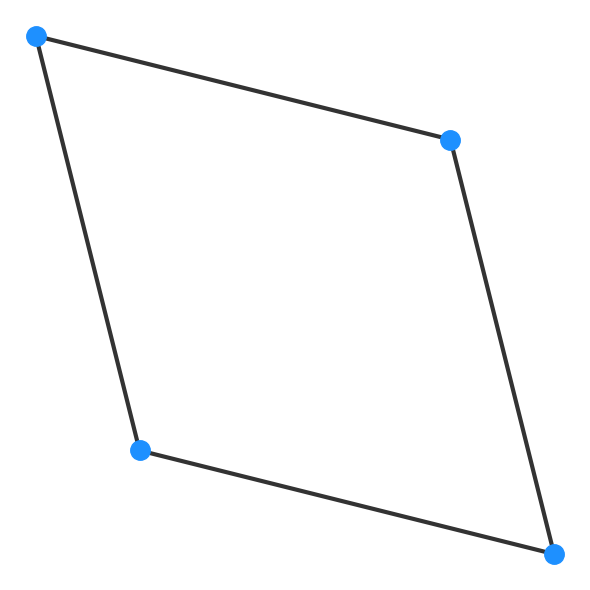

[-2.11085322e-16 -1.05472747e-16  1.87256275e-16  6.01283412e-16
  1.05882353e+00  2.00000000e+00  2.00000000e+00  2.94117647e+00]


In [51]:
strainMatrix = np.array([[1,-0.25],[-0.25,1]])
em = F.elasticModulus(strainMatrix)

coordinates_new = np.dot(coordinates,strainMatrix)

F_new = F= rp.framework(coordinates_new,bonds,basis)
F_new.visualize()
config_new = rp.configuration(coordinates_new,bonds,basis)
eigenValues_new, eigenVectors_new = F_new.eigenSpace(eigvals = None)

print(eigenValues_new)

Come possiamo vedere vengono intaccati da questa trasformazione solo gli autovalori che non erano nulli, in particolare il quinto autovalore ed l'ottavo autovalore. Studiamo allora come si comportano tali autovalori variando la deformazione.

Questi due autovalori sono legati alla direzione delle deformazione che sto applicando, notiamo che con tale deformazione la distanza tra due punti opposti aumenta così come l'autovalore 7, mentre tra gli altri due punti opposti diminuisce così come l'autovalore 4.

Adesso studiamo un sistema più complesso inserendo una molla nella diagonale che collega due punti.

[]


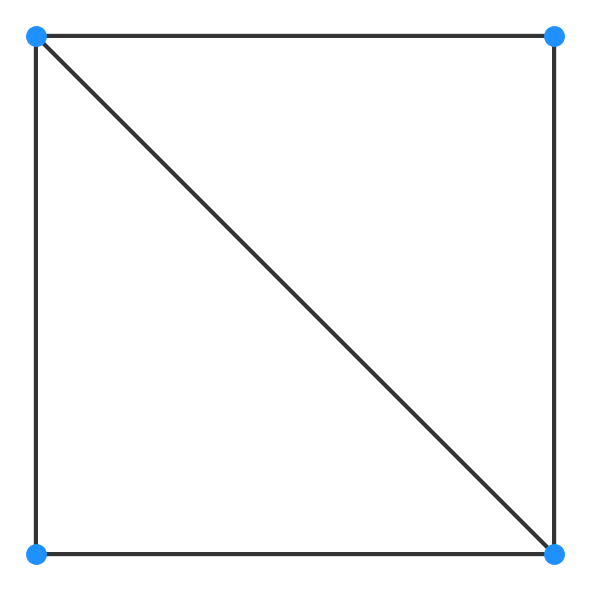

[[ 1.   0.   0.   0.   0.   0.  -1.   0. ]
 [ 0.   1.   0.  -1.   0.   0.   0.   0. ]
 [ 0.   0.   1.5 -0.5 -1.   0.  -0.5  0.5]
 [ 0.  -1.  -0.5  1.5  0.   0.   0.5 -0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   1.   0.  -1. ]
 [-1.   0.  -0.5  0.5  0.   0.   1.5 -0.5]
 [ 0.   0.   0.5 -0.5  0.  -1.  -0.5  1.5]]
[0.00000000e+00 1.38777878e-16 4.44089210e-16 5.85786438e-01
 2.00000000e+00 2.00000000e+00 2.00000000e+00 3.41421356e+00]
[[ 0.          0.51882639  0.04006328  0.51882639  0.04006328  0.47876311
   0.          0.47876311]
 [ 0.61237244 -0.20412415  0.20412415 -0.20412415  0.20412415  0.20412415
   0.61237244  0.20412415]
 [ 0.         -0.25328347 -0.57595856 -0.25328347 -0.57595856  0.3226751
   0.          0.3226751 ]
 [-0.46193977 -0.46193977  0.19134172 -0.19134172  0.46193977  0.46193977
  -0.19134172  0.19134172]
 [ 0.61237244 -0.20412415 -0.20412415  0.20412415  0.20412415  0.20412415
  -0.61237244 -0.20412415]
 [ 0.          0.55767754 -0

In [114]:
coordinates = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/coordinates.txt")
temp = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/bonds2.txt")
bonds = temp.astype(int)
basis = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/basis.txt")
F= rp.framework(coordinates,bonds,basis)
F.visualize()

#Eigenvalues, Eigenvectors = np.linalg.eig(F.hessianMatrix())
print(F.hessianMatrix())

config = rp.configuration(coordinates,bonds,basis)
Eigenvalues, Eigenvectors = F.eigenSpace(eigvals = None)
print(Eigenvalues)
print(Eigenvectors)

Plottiamo l'autovettore relativo all'autovalore 0.5857864376269037


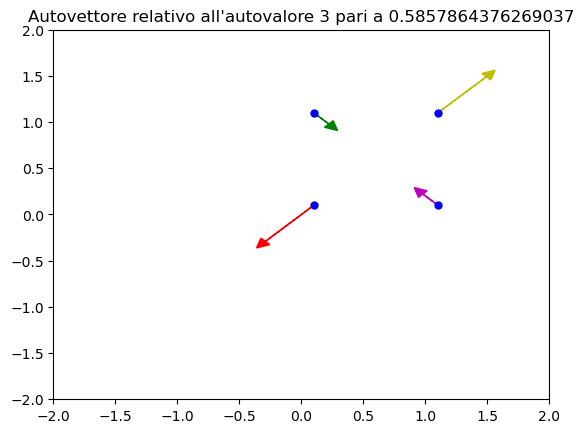

In [125]:
eigenVector_plotting(3,coordinates,Eigenvalues,Eigenvectors)

Rappresentiamo dunque il sistema ora più complesso e notiamo che negli autovalori, il quarto autovalore ora non è più nullo, e gli altri quattro autovalori ora non sono più identici. Ciò ci fa pensare che l'aver introdotto tale molla lungo la diagonale debba aver rotto una simmetria a cui sono collegati gli autovalori che hanno subito una variazione rispetto al modello precedente.

Applichiamo ora la stessa deformazione

[]
[]


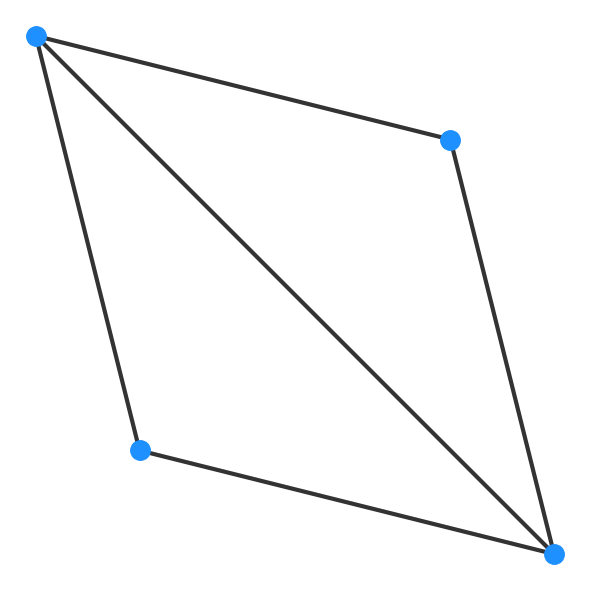

[-5.02087259e-16  7.52005363e-17  2.78586973e-16  2.85014149e-01
  1.05882353e+00  2.00000000e+00  2.94117647e+00  3.71498585e+00]


In [38]:
strainMatrix = np.array([[1,-0.25],[-0.25,1]])
em = F.elasticModulus(strainMatrix)

coordinates_new = np.dot(coordinates,strainMatrix)

F_new = F= rp.framework(coordinates_new,bonds,basis)
F_new.visualize()
config_new = rp.configuration(coordinates_new,bonds,basis)
eigenValues_new, eigenVectors_new = F_new.eigenSpace(eigvals = None)

print(eigenValues_new)

Subiscono una variazione sul valore tutti gli autovalori tranne i primi tre che rimangono nulli ed il sesto che rimane pari a 2. Dunque ora possiamo studiare come si comportano tali autovalori in base alla deformazione.

Come notiamo l'autovalore 4 e 7 si comportano esattamente come visto in precedenza, ma ora si sono aggiuntigli autovalori 6 e 3. 

Ora proviamo a pinnare ossia fissare un elemento del reticolo ed applicare la deformazione.

[]


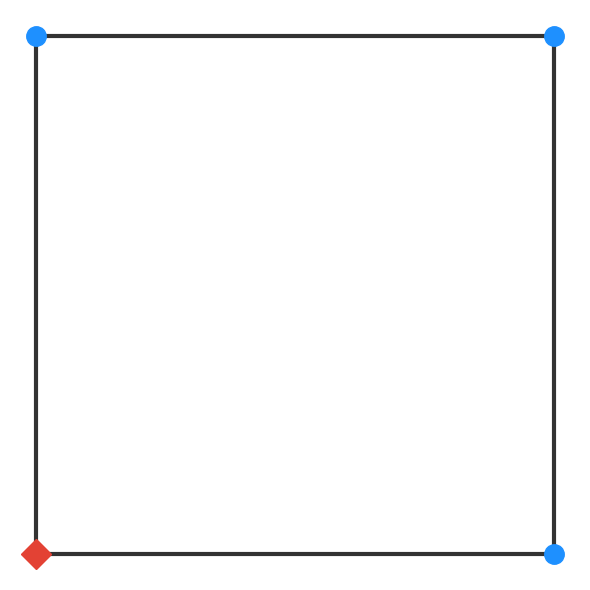

[1.11022302e-15 1.11022302e-15 1.00000000e+00 1.00000000e+00
 2.00000000e+00 2.00000000e+00]
[[0.1 0.1]
 [0.1 1.1]
 [1.1 1.1]
 [1.1 0.1]]


In [40]:
coordinates = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/coordinates.txt")
temp = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/bonds.txt")
bonds = temp.astype(int)
basis = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/basis.txt")
pins=[0] #In questo comando sto fissando il punto zero appartenente al reticolo che verrà evidenziato in rosso
F= rp.framework(coordinates,bonds,basis,pins)
F.visualize()
config = rp.configuration(coordinates,bonds,basis)
eigenValues, eigenVectors = F.eigenSpace(eigvals = None)

print(eigenValues)
print(coordinates)

Pinnando un punto notiamo che gli autovalori sono ora 6, questo perchè un punto ha perso i due gradi di libertà. Altro punto degno di nota è che anche cambiando il punto pinnato gli autovalori del sistema non deformato non cambiano.

Gli autovalori che erano nulli rimangono tali mentre variano gli altri quattro. In questo caso cambiando il nodo pinnato cambiano anche gli autovalori non nulli.

[]


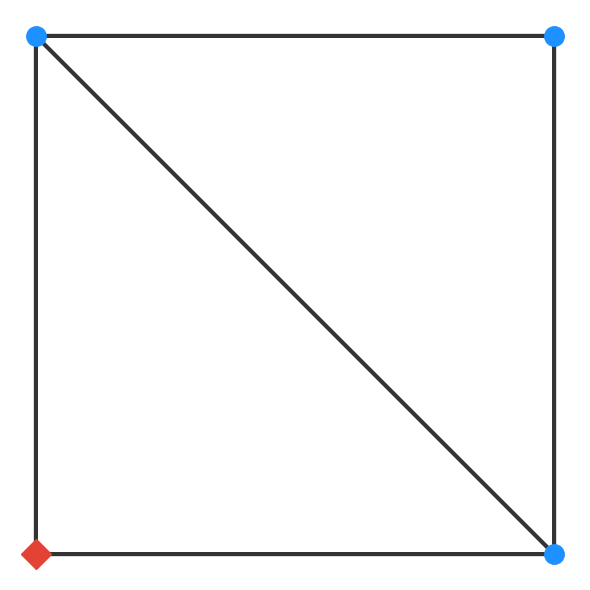

[2.40548321e-16 1.98062264e-01 1.00000000e+00 1.55495813e+00
 2.00000000e+00 3.24697960e+00]


In [42]:
coordinates = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/coordinates.txt")
temp = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/bonds2.txt")
bonds = temp.astype(int)
basis = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/basis.txt")
pins=[0]
F= rp.framework(coordinates,bonds,basis,pins)
F.visualize()
config = rp.configuration(coordinates,bonds,basis)
eigenValues, eigenVectors = F.eigenSpace(eigvals = None)

print(eigenValues)

In questo caso cambiando il punto pinnato notiamo che gli autovalori di punti pinnati opposti tra loro sono uguali, ciò è probabilmente dovuto alla simmetria introdotta dalla molla diagonale.

STUDIO SU UN SISTEMA UNIDIMENSIONALE PER CAPIRE MEGLIO AUTOVETTORI E AUTOVALORI DELL'HESSIANA

[]


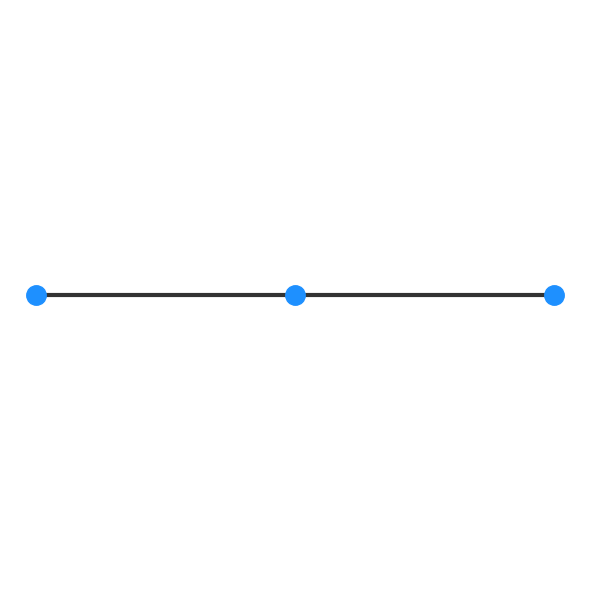

In [4]:
coordinates = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/coordinates3.txt")
temp = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/bonds3.txt")
bonds = temp.astype(int)
basis = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/basis.txt")
#pins = [0]
F= rp.framework(coordinates,bonds,basis)
F.visualize()


Eigenvector 1: Eigenvalue=3\
-0.408248 \
0\
0.816497\
0\
-0.408248\
0

Eigenvector 2: Eigenvalue=1\
-0.707107 \
0\
0\
0\
0.707107\
0

Eigenvector 3: Eigenvalue=0\
0\
0\
0\
1\
0\
0

Eigenvector 4: Eigenvalue=0\
0\
1\
0\
0\
0\
0

Eigenvector 5: Eigenvalue=0\
0\
0\
0\
0\
0\
1

Eigenvector 6: Eigenvalue=0\
0.57735\
0\
0.57735\
0\
0.57735\
0

